# __Exploratory data analysis (EDA)  - Select and indentify features importance__
- Dataset: Guarujá (cap. 1)

##### Copyright 2021 Caio Azevedo - ensaios de uma dissertação. 

28 de julho de 2021 - última atualização __todo santo dia__
- ref. https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers
- ref. https://www.tensorflow.org/tutorials/structured_data/feature_columns

__Objetivos__:
- Melhor compreender o fenômeno de escorregamentos por meio da análise de suas features
- Identificação de métodos para identificação da relevância das features
- Análise __exploratória__ dos dados: identificação de possíveis atributos irrelevantes, dataset profiling, interpretação das features;  
- Identificação de possíveis features irrelevantes:
   - Matriz de correlação;
   - SelectKBest (F-test para pontuação das features - seleção de feture baseado em ANOVA para input numérico e saída categorica)
   - SelectPercentile (teste estatítisticos univariados)
   - Feature Importance (do RandomForestClassifier)
   - IGR (information gain ratio) - feature engineering;
      
__referências mendeley__:
- ref.1: New ensemble models for shallow landslide susceptibility modeling in a semi-aridwatershed
- ref.2: Spatial prediction models for shallow landslide hazards: a comparative assessment of the efficacy of support vector machines, artificial neural networks, kernel logistic regression, and logistic model tree
- ref.3: Landslide susceptibility mapping with r.landslide: A free open-source GIS-integrated tool based on Artificial Neural Networks
- ref.4: Attribute selection using correlations and principal components for artificial neural networks employment for landslide susceptibility assessment
- ref.5: Review of Input Variable Selection Methods for Artificial Neural Networks
- ref.6: Machine Learning Feature Selection Methods for Landslide Susceptibility Mapping
- ref.7: Support vector regression modeling of coal flotation based on variable importance measurements by mutual information method
- ref.8: Applied Predictive Modeling with Applications in R __livro com RFE, definições, etc__

__referências python e artigos__:

- ref.1: https://www.datasklr.com/ols-least-squares-regression/variable-selection  (somente casos de regressão)
- ref.2: https://machinelearningmastery.com/information-gain-and-mutual-information/
- ref.3: https://machinelearningmastery.com/calculate-feature-importance-with-python/
- ref.4: https://link.springer.com/article/10.1007/s00170-020-05641-y
- ref.5: https://www.sciencedirect.com/science/article/abs/pii/S096599781200004X
- ref.6: https://www.sciencedirect.com/science/article/pii/S2666546820300288
- ref.7: https://www.datacamp.com/community/tutorials/feature-selection-python
- ref.8: https://www.kdnuggets.com/2020/01/explaining-black-box-models-ensemble-deep-learning-lime-shap.html
- ref.9: https://romainlhardy.medium.com/estimating-feature-importance-the-easy-way-2ebe970c600c
- ref.10: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/


__Sobre o pandas profiling__:

1. executar o miniconda como administrador
2. pip install pandas-profiling ==2.7.1 #Installing via pip
3. jupyter nbextension enable --py widgetsnbextension # enable the widget extension in jupyter

In [1]:
import Rede_Neural as rna
from Rede_Neural import NeuralNetwork
from Rede_Neural import Layer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs, make_circles, make_moons, make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from utils.samples_generator import make_spiral, make_square, make_cubic, make_exp, make_log10
from utils import plot

%matplotlib inline

In [2]:
from pandas_profiling import ProfileReport

In [3]:
#divide o dataset em treino-teste-validação
def dataPreparation2(dataSet):
    X = dataSet.drop('class',axis=1)
    y= dataSet['class']
    
    #X = X.to_numpy()    #converts dataframe into array to be used at NN
    #y = y.to_numpy()    #converts dataframe into array to be used at NN
    #y = y.reshape(-1,1) #reorganiza o array em um array 1 x 1
    
    # split data into training, validation and testing sets
    seed = 7
    test_size = 0.30
    
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=test_size, shuffle=False)
    train_x, val_x, train_y, val_y   = train_test_split(train_x,train_y, test_size=test_size, shuffle=False)

    # define the scaler
    #scaler = MinMaxScaler(feature_range=(-1, 1)) 
    #scaler = MinMaxScaler() 
    # fit on the training dataset
    #scaler.fit(train_x)
    # scale the training dataset
    #train_x = scaler.transform(train_x)
    # scale the test dataset
    #test_x = scaler.transform(test_x)
    # scale the test dataset
    #val_x = scaler.transform(val_x)
    return train_x, test_x, val_x, train_y, test_y, val_y

In [4]:
import os, sys
import pandas as pd
from sklearn.model_selection import train_test_split
APP_PATH = os.getcwd()


#file = "Input_Guaruja_50m_shuffled.csv"
#file = "Input_Guaruja_100m_shuffled.csv"
#file = "Input_Guaruja_150m_shuffled.csv"
#file = "Input_Guaruja_200m_shuffled.csv"

#file = "pt_nocorrencias_1km_shuffled.csv"
#file = "pt_nocorrencias_2km_shuffled.csv"
#file = "pt_nocorrencias_3km_shuffled.csv"
#file = "pt_nocorrencias_4km_shuffled.csv"

file = "ptos_aleatorios_shuffled.csv"

dataset = pd.read_csv(os.path.join(APP_PATH, os.path.join("data", file))) 

dataset.head(5)

,FID,X,Y,TWI,Curvatura,Declividade,Elevacao,Aspecto,Geologia,Uso,class
0,98,381913.2155,7358368.235,27.338095,0.002735,27.338095,120.943680,330.186584,65,90,0
1,152,375711.0000,7348857.000,5.155329,0.006004,24.772690,17.397917,113.472549,2,20,1
2,95,383008.5927,7357558.608,24.757074,0.000368,24.757074,207.428345,121.768433,65,90,0
3,106,371074.0000,7345111.000,6.688554,-0.010576,29.801399,15.330963,71.881042,2,20,1
4,82,375019.5230,7353140.890,0.221845,-0.000012,0.221845,2.162373,185.550385,2,70,0


In [5]:
dataset.rename(columns={'TWI': 'twi','Curvatura': 'curv', 'Declividade': 'slope','Elevacao': 'elevation','Aspecto': 'aspect', 'Geologia': 'lito', 'Uso': 'uso_solo'}, inplace=True)
dataset.head(5)

,FID,X,Y,twi,curv,slope,elevation,aspect,lito,uso_solo,class
0,98,381913.2155,7358368.235,27.338095,0.002735,27.338095,120.943680,330.186584,65,90,0
1,152,375711.0000,7348857.000,5.155329,0.006004,24.772690,17.397917,113.472549,2,20,1
2,95,383008.5927,7357558.608,24.757074,0.000368,24.757074,207.428345,121.768433,65,90,0
3,106,371074.0000,7345111.000,6.688554,-0.010576,29.801399,15.330963,71.881042,2,20,1
4,82,375019.5230,7353140.890,0.221845,-0.000012,0.221845,2.162373,185.550385,2,70,0


In [6]:
dataset = dataset[['slope','aspect','elevation','uso_solo','lito','twi','curv','class']]
dataset.head(5)

,slope,aspect,elevation,uso_solo,lito,twi,curv,class
0,27.338095,330.186584,120.943680,90,65,27.338095,0.002735,0
1,24.772690,113.472549,17.397917,20,2,5.155329,0.006004,1
2,24.757074,121.768433,207.428345,90,65,24.757074,0.000368,0
3,29.801399,71.881042,15.330963,20,2,6.688554,-0.010576,1
4,0.221845,185.550385,2.162373,70,2,0.221845,-0.000012,0


- Slope angle: Slope degree is one of the most frequently-used factors in assessing landslide 
susceptibility. It has a great influence on slope stability and is directly related to the different types of mountain hazards. 
- Slope aspect: It is defined as the direction of terrain surface, such as north, northeast and so on. Since hillsides orientated differently receive direct solar radiation and rainfall in different amounts, which lead to different slope topography, humidity and plant cover, the slope aspect is also accepted as a conditioning factor. 
- Plan curvature: Curvature is defined as the change rate of slope angle with surface plane. The
direction of drainage line is influenced by plan curvature types, and the river erosion is a key factor that affects the slope stability.
-  TWI = topographic wetness index: is defined as a theoretical measure of flow accumulation and hence soil moisture at any point within a basin. From this, landslide susceptibility can be estimated as a function of the relationship of the topographic effects on the hydrological response of an area (Gómez and Kavzoglu, 2005; Tien Bui et al., 2017).
- uso_solo: 10 = Mata, 20 = Campo antrópico; 30 = Área urbana; 40 = Mangue.

#### 1. TWI = **topographic wetness index** 
- is defined as a theoretical measure of flow accumulation and hence soil moisture at any point within a basin. From this, landslide susceptibility can be estimated as a function of the relationship of the topographic effects on the hydrological response of an area (Gómez and Kavzoglu, 2005; Tien Bui et al., 2017). 

- In a seminal work, Beven and Kirkby (1979) proposed the Eq. 1 for the calculation of the topographic wetness index, assuming static conditions: 
$$ TWI = ln \left( \frac {A_s} {tan \beta} \right) $$
where AS is the upslope contributing area per unit contour length and t βan is the local slope. Thus, the index reflects the tendency of soil
saturation developing at any point in a basin (in terms of As), as well as the tendency of the gravitational forces to provide the flow, expressed in terms of t βan as an approximation of the hydraulic gradient (Pourghasemi et al., 2012).

- ref. **Artificial neural network ensembles applied to the mapping of landslide susceptibility**

**dados POA**:     Mean	7.524862451630001 Minimum	5.29067421 Maximum	10.82358265

**dados Guarujá**: Mean	5.075 Minimum	2 Maximum	14

Me chamou atenção o fato desses valores serem sempre inteiros, visto que: 

-   1.1. eles são o produto de uma relação logarítimica neperiana o que implica que seus resultados são numeros irracionais. 
   
-   1.2 o paralelo com os valores de POA.

#### 2. Curvatura = **Profile curvature** = **curvature**

- Em alguns trabalhos achei, não como sinonimos as seguintes features - "general curvature", "plan curvature", "profile curvature" assim definidos. No nosso caso, qual é o equivalente à curvatura ? 

- Curvature has been frequently used in landslide studies attributing to its **ability  to  control  the  water flow** on the surface (Pham et al. 2015). It is defined as the **inverse of the value of the radius of the curvature of the line** (Nefeslioglu, Duman, and Durmaz 2008). Due to the inverse proportionality tighter curves tend to have higher values of curvature as compared to wider curves (Ding, Chen, and Hong 2017). **Plan curvature** is the value of the curvature associated with a contour formed from the intersection of the landform surface and the horizontal plane hence representing the bending of the surface in perpendicular direction (Pham et al. 2016). On the other hand, **Profile Curvature** indicates the rate of change of slope or the curvature in the vertical plane (Ding, Chen, and Hong 2017). All the three factors of curvature, plan curvature and profile curvature interweave controlling the acceleration, deceleration and viscosity of the flow on the surface (Moosavi and Niazi. 2016).
- ref. **A novel voting ensemble model for spatial prediction of landslides using GIS**

 - **Surface curvature** reveals the earth’s ground shape including soil run off. **Profile curvature** is in parallel direction with maximum slope. It has influence on speeding up or slowing down of run off on the surface. The other factor namely **plan curvature**, however, is at the 90 degrees to the orientation of maximum slope which indicates the encounter or separation of flow on a surface. In principal, curvature is summation of plan and profile curvature. In this research, total, profile and plan curvature were categorized based on three clasess namely concave, flat and covex.
 - ref. **Conditioning factor determination for mapping and prediction of landslide susceptibility using machine learning algorithms**

**dados POA**:     Mean	-0.0034065968499999992 Minimum	-0.04679997 Maximum	0.06620347

**dados Guarujá**: Mean	-0.0053962765999999995 Minimum	-0.58625609 Maximum	0.0261966

Esses dados são mais condizentes com a realidade pelo critério de verosemelhança com os dados de POA

####  3. Declividade % = slope. 

- the slope is characterized as one of the **main parameters** that influence the triggering of landslides since it is related to the velocity of the surface and groundwater flow and, consequently, to the moisture content of the soil, capillary pressure and distribution of saturated and non-saturated zones (Gómez and Kavzoglu, 2005; Zêzere et al., 2017).
 - ref. **Artificial neural network ensembles applied to the mapping of landslide susceptibility**

- Slope is considered as one of critical causing landslide hazard in areas with sharp slope due to soil weakness and stresses. In this study, slope angle was classified into 5 levels, including: (i) 0°-8.4°, (ii) 8.5°-13°, (iii) 14°-17°, (iv) 18°- 23°, and (v) 24°-48° (Figure 1c).
 - ref. **Conditioning factor determination for mapping and prediction of landslide susceptibility using machine learning algorithms**
- the declivity of the slope, in degrees. Range: 0–80◦ 
  - ref. **Attribute selection using correlations and principal components for artificial neural networks employment for landslide susceptibility**
- é o ângulo de inclinação da encosta e, assim como a elevação, é constantemente utilizado para modelagens de suscetibilidade a deslizamentos, sendo muitas vezes considerado o fator de maior relevância para a modelagem (Lee & Min, 2001; Kavzoglu et al., 2014; Nourani et al., 2014).
 - ref. **Capacidade de Generalização e Extrapolação de Redes Neurais Artificiais no Mapeamento a Suscetibilidade de Deslizamentos**

 - Porque temos __seis zeros (0)__ ? Segundo a literatura a unidade de medida desse atributo é dado em graus. Porque está descrito em valor percentual ? Também achei estranho o fato dos dados serem todos valores inteiros. E sendo medido em graus, é estranho termos angulação superior à 90, aliás a literatura falar em range de 0 - 80.
 
 
 - **dados POA**:     Mean	16.927578127999997 Minimum	0.9939538 Maximum	50.76429
 
 - **dados Guarujá**: Mean	47.03 Minimum	0 Maximum	263

4. **Elevação = Elevation = Altitude (sim, mesma coisa)**
 
- representa as altitudes presentes na região e é um parâmetro amplamente utilizado em processos de modelagem. Sua variação tem efeito notável em modelos de suscetibilidade dependendo da região (Nourani et al., 2014; Hong et al., 2016; Al-Najjar et al., 2019).
 - ref. **Capacidade de Generalização e Extrapolação de Redes Neurais Artificiais no Mapeamento a Suscetibilidade de Deslizamentos**
 
- Alternation in the **altitude** has noticeable effect on landslide susceptibility models. In our study, we divided the altitude to 5 classes via natural break pattern. Accordingly, its classes were defined from minimum value of 74 meters to maximum of 1500 meters.
 - ref. **Conditioning factor determination for mapping and prediction of landslide susceptibility using machine learning algorithms**


- Entendo que esses dados estejam condizentes, seja pela revisão da literatura, seja por comparação com POA.
- **dados POA**: Mean	84.48853476999999 Minimum	0.9305370000000001 Maximum	257.71
- **dados Guarujá**: Mean	64.235 Minimum	1 Maximum	226

5. **Aspecto = aspect**
 - This factor, generally, represents the compass orientation that a slope or hillshade confronts. It is also can be used as indication for some measurements of plants group, soil moistures and evaporation. It is categorized into 9 classes including: (i) flat, (ii) north, (iii) northeast, (iv) east, (v) southeast, (vi) south, (vii) southwest, (viii) west, and (ix) northwest.
     - ref. **Conditioning factor determination for mapping and prediction of landslide susceptibility using machine learning algorithms**
 - The orientation, **in degrees**, of the hill slope. Range: 0–360◦    

- **dados POA**: Mean	201.71427788 Minimum 3.4178550000000003 Maximum	355.0102
- **dados Guarujá**: Mean 207.81 Minimum 0 Maximum	358

- Entendo que esses dados estejam condizentes, seja pela revisão da literatura, seja por comparação com POA.

6. **Geologia = geology**
- confesso que não entendi, não achei na literatura o que seria essa geologia, visto que sua definição é "**estuda a Terra quanto à sua origem, composição, estrutura e evolução**" Seria o tipo ou uso do solo ? na nossa amostra temos apenas dois valores distintos.

Inicio da seleção de features e/ou identificação daquelas de maior relevância dentro do nosso espaço de estudo.

- ref. 1 (paper):  __Review of Input Variable Selection Methods for Artificial Neural Networks__
- ref. 2 (paper):  __Machine Learning Feature Selection Methods for Landslide Susceptibility Mapping__
- ref. 3 (paper):  __Attribute selection using correlations and principal components for artificial neural networks employment for landslide susceptibility assessment__


   - Interessante que o artigo 3 foi escrito por brasileiros. Mais importante que isso é o fato que eles concluiram que a seleção e tentativas de remoção de atributos tornou a performance da RNA deles pior que se usando os 11 atributos iniciais utilizados no estudo. Os autores utilizaram correlação de pearson e PCA. Mas isso não é uma regra conforme descrito no próprio artigo.

   - Correlação de Pearson (rank correlation): The selection of candidate variables that are sorted by order of decreasing correlation is based either on greedy selection of the first k variables, or upon all variables for which the correlation is significantly different from zero. The significance of the Pearson correlation can be determined directly, since the error associated with estimation of correlation from a sample is defined by the t-distribution. A rule of thumb (for large n) is that variables with an absolute correlation greater than  $$ \frac {2} {\sqrt{n}} $$ are significant.
   
  - Recursive feature elimination: The RFE approach involves an iterative process of training an ANN model, initially using all candidate input variables, and then removing one or more input variables at each iteration based on the rank magnitude of the weights corresponding to each input variable.

In [7]:
# split data into X and y - POA
X = dataset
X

,slope,aspect,elevation,uso_solo,lito,twi,curv,class
0,27.338095,330.186584,120.943680,90,65,27.338095,0.002735,0
1,24.772690,113.472549,17.397917,20,2,5.155329,0.006004,1
2,24.757074,121.768433,207.428345,90,65,24.757074,0.000368,0
3,29.801399,71.881042,15.330963,20,2,6.688554,-0.010576,1
4,0.221845,185.550385,2.162373,70,2,0.221845,-0.000012,0
...,...,...,...,...,...,...,...,...
195,65.807915,335.578705,183.386307,90,65,3.111852,0.009217,1
196,34.884327,335.742798,76.214539,90,2,34.884327,-0.003104,0
197,16.367725,167.967239,99.617256,90,2,16.367725,0.009234,0
198,30.434063,155.315613,226.055237,90,65,30.434063,0.000543,0


In [8]:
# A common mistake done with feature selection is to search a subset of discriminative features on the full dataset 
#instead of only using the training set. 

In [9]:
profile = ProfileReport(X, title="Análise das features da base do Guarujá")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
X.describe()

,slope,aspect,elevation,uso_solo,lito,twi,curv,class
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,23.941003,209.786922,64.324397,75.800000,32.555000,14.420222,0.034933,0.49500
std,11.792819,103.922925,56.081392,26.719462,31.564833,13.621558,0.407112,0.50123
min,0.094349,0.040240,0.233454,20.000000,2.000000,0.094349,-0.586256,0.00000
25%,18.080066,121.035282,14.330164,90.000000,2.000000,4.294376,-0.008205,0.00000
50%,25.331100,202.735687,54.483145,90.000000,2.000000,6.125394,-0.000357,0.00000
75%,30.772825,316.396835,94.712227,90.000000,65.000000,26.331445,0.002600,1.00000
max,69.731888,359.505798,226.055237,90.000000,65.000000,69.731888,4.304924,1.00000


In [11]:
df_max = X.max()
df_min = X.min()
df_range = df_max - df_min
df_range

slope         69.637538
aspect       359.465559
elevation    225.821783
uso_solo      70.000000
lito          63.000000
twi           69.637538
curv           4.891180
class          1.000000
dtype: float64

__Seleção ou análise de relevância das features__
- ref. https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

A seleção de features é um processo em que você seleciona automaticamente as features em seus dados que mais contribuem para a variável de previsão ou saída na qual se está interessado.

Ter features irrelevantes em seus dados pode diminuir a precisão de muitos modelos, especialmente algoritmos lineares como regressão linear e logística.

Três benefícios de realizar a seleção de recursos antes de modelar seus dados são:
- Reduz o overfitting: menos dados redundantes significa menos oportunidade de tomar decisões com base no ruído.
- Melhora a acurácia: menos dados enganosos significam que a precisão da modelagem melhora.
- Reduz o tempo de treinamento: menos dados significa que os algoritmos treinam mais rápido.

Statistical-based feature selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable. These methods can be fast and effective, although the choice of statistical measures depends on the data type of both the input and output variables.
- Os métodos de seleção de features baseados em estatística envolvem a avaliação do relacionamento entre cada uma das variáveis de entrada e a variável de saída. Essa avaliação é feita por meio de técnicas estatísticas, cuja escolha está condicionada ao tipo dos dados de entrada e saída.

There are two main types of feature selection techniques: supervised and unsupervised, and supervised methods may be divided into wrapper, filter and intrinsic.
Filter-based feature selection methods use statistical measures to score the correlation or dependence between input variables that can be filtered to choose the most relevant features.
- Existem dois tipos principais de tecnicas de seleção de features: supervisionada e não supervisionada, e os métodos supervisionados podem ser divididos em wrapper, filtro e intrínsecos.
Os métodos baseados em filtros, utilizam medidas estatísticas para pontuar a correlação ou dependencia entre as variáveis de entrada que pode ser filtradas para selecionar aquelas de maior relevância. 
Quando a variável de saída é ignorada durante o processo de seleção de features, esse processo é dito não supervisionado, como por exemplo os métodos que removem variáveis reduntantes usando correlação.

Wrapper feature selection methods create many models with different subsets of input features and select those features that result in the best performing model according to a performance metric. These methods are unconcerned with the variable types, although they can be computationally expensive. RFE is a good example of a wrapper feature selection method.

- Os métodos de seleção do tipo wrapper, criam diversos modelos com diferentes subconjunto de variáveis de entrada e seleciona aquelas features cujo resultado possue melhor desempenho mensurado por uma métrica previamente estabelecida. Esses métodos são computacionalmente custosos e não consideram o tipo de variáveis, sendo compatível com todos eles. RFE é um bom exemplo de um método wrapper.
- Os métodos de wrapper avaliam vários modelos usando procedimentos que adicionam e / ou removem variáveis para encontrar a combinação ideal que maximiza o desempenho do modelo. Em essência, os métodos de wrapper são algoritmos de pesquisa que tratam os preditores como entradas e utilizam o desempenho do modelo como saída a ser otimizada.

Filter methods evaluate the relevance of the predictors outside of the predictive models and subsequently model only the predictors that pass some criterion.
- Os métodos de __filtro__ avaliam a relevância dos preditores fora do contexto do modelo preditivo e, posteriormente, modelam apenas os preditores que passam por algum critério.  

- Finalmente, existem alguns algoritmos de aprendizado de máquina que realizam a seleção de features automaticamente como parte do aprendizado do modelo. Podemos nos referir a essas técnicas como métodos de seleção de features __intrínsecos ou embedded__. Alguns modelos contêm seleção de features integrados, o que significa que o modelo incluirá apenas preditores que ajudam a maximizar a precisão. Nesses casos, o modelo pode selecionar e escolher qual representação dos dados é a melhor.

A seleção de features também está relacionada a técnicas de redução dimensional em que ambos os métodos buscam menos variáveis de entrada para um modelo preditivo. A diferença é que a seleção de features seleciona recursos para manter ou remover do conjunto de dados, enquanto a redução de dimensionalidade cria uma __projeção dos dados__, resultando em features de entrada inteiramente novos. Como tal, a redução de dimensionalidade é uma alternativa à seleção de recursos, em vez de um tipo de seleção de recursos.

As medidas estatísticas usadas na seleção de features com base em filtro são geralmente calculadas uma variável de entrada por vez com a variável de saída. Como tal, são chamadas de __medidas estatísticas univariadas__. Isso pode significar que qualquer interação entre variáveis de entrada não é considerada no processo de filtragem

### Numerical Input, Categorical Output 

- Este é um problema de modelagem preditiva de classificação com variáveis de entrada numéricas.
Optamos por técnicas baseadas em correlação conforme xx, embora, neste caso, elas devam levar em consideração o alvo categórico. ANOVA correlation coefficient (linear).
O método ANOVA é um tipo de estatística F referida aqui como teste f ANOVA. Os resultados deste teste podem ser usados para seleção de recursos, onde os recursos que são independentes da variável de destino podem ser removidos do conjunto de dados.

- referencial sobre ANOVA: 
  - https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
  - https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476
  
- Algumas medidas estatísticas assumem propriedades das variáveis, como a de Pearson, que assume uma distribuição de probabilidade gaussiana para as observações e uma relação linear. Você pode transformar os dados para atender às expectativas do teste e tentar o teste independentemente das expectativas e comparar os resultados.

__Matriz de correlação de Pearson como critério para eliminação de features altamente relacionadas, vide modelo de análise proposto na dissertação.__

In [12]:
# encontra e remove as  features correlacionadas
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method ='pearson') 
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [13]:
corr_features = correlation(X, 0.8)
print(corr_features)
print('features correlacionadas: ', len(set(corr_features)) )

set()
features correlacionadas:  0


In [14]:
#matriz de correlação
corr = X.corr()
corr = corr.style.background_gradient(cmap='Blues')
corr

,slope,aspect,elevation,uso_solo,lito,twi,curv,class
slope,1.000000,0.047374,0.327813,0.045595,0.053085,0.561582,0.038969,0.020226
aspect,0.047374,1.000000,0.044750,-0.144621,0.153716,0.044680,-0.052354,-0.001166
elevation,0.327813,0.044750,1.000000,0.334682,0.446648,0.399215,-0.006638,-0.342653
uso_solo,0.045595,-0.144621,0.334682,1.000000,0.081605,0.276316,-0.050376,-0.313006
lito,0.053085,0.153716,0.446648,0.081605,1.000000,0.078421,-0.008796,-0.040320
twi,0.561582,0.044680,0.399215,0.276316,0.078421,1.000000,-0.067962,-0.690235
curv,0.038969,-0.052354,-0.006638,-0.050376,-0.008796,-0.067962,1.000000,0.084041
class,0.020226,-0.001166,-0.342653,-0.313006,-0.040320,-0.690235,0.084041,1.000000


- __Como nenhuma das variáveis são correlacionadas (acima de 0.8), elas são consideradas independentes e por essse critério manteremos todas elas no nosso modelo__
- interessante que as variáveis elevação e declividade são os mais correlacionados o que faz total sentido, conforme confirmado com a Alessandra.
- declividade, elevação e uso do solo são as variáveis mais relacionadas com o escorregamento 'class'

In [15]:
X_train, X_test, X_val, y_train, y_test, y_val = dataPreparation2(dataset)

In [16]:
print(len(X_train), 'train examples')
print(len(X_val), 'validation examples')
print(len(X_test), 'test examples')

98 train examples
42 validation examples
60 test examples


In [17]:
# A common mistake done with feature selection is to search a subset of discriminative features on the full dataset 
#instead of only using the training set. 

__Seleção de Features__ - sklearn.feature_selection classe SelectKBest, seleciona as k melhores features, falta melhor com o SelectPercentile
- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
- https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection_pipeline.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-pipeline-py
- https://qastack.com.br/datascience/10773/how-does-selectkbest-work
- https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476 (sobre ANOVA)
- https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/ (mais sobre ANOVA e f-test)
- https://statisticsbyjim.com/anova/f-tests-anova/ (anova)

In [18]:
# #############################################################################
# seleção de features univariada com F-test para pontuação das features
# Adotou-se a seleção padrão para identificar as 4 features mais significativas (com base na análise anterior)
# Seleção de feature por ANOVA (análise de variância) para input numérico e output categorico
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# setup da classe KBestFeatures - k=4 features mais relevantes
fs = SelectKBest(score_func=f_classif, k=5)
# aplica a seleção de features
X_selected = fs.fit_transform(X_train, y_train)
print(X_selected.shape)

(98, 5)


In [19]:
predictors = X_train.columns
predictors

Index(['slope', 'aspect', 'elevation', 'uso_solo', 'lito', 'twi', 'curv'], dtype='object')

In [20]:
fs.pvalues_

array([7.52523175e-01, 5.38928788e-01, 1.16065831e-05, 1.08623163e-02,
       1.22030956e-01, 2.36775659e-18, 3.93626376e-01])

In [21]:
fs.scores_

array([9.99941517e-02, 3.80250569e-01, 2.14081867e+01, 6.74799337e+00,
       2.43385889e+00, 1.17493779e+02, 7.34301941e-01])

C:\Users\cazev\AppData\Local\Temp\ipykernel_6532\1461952677.py:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


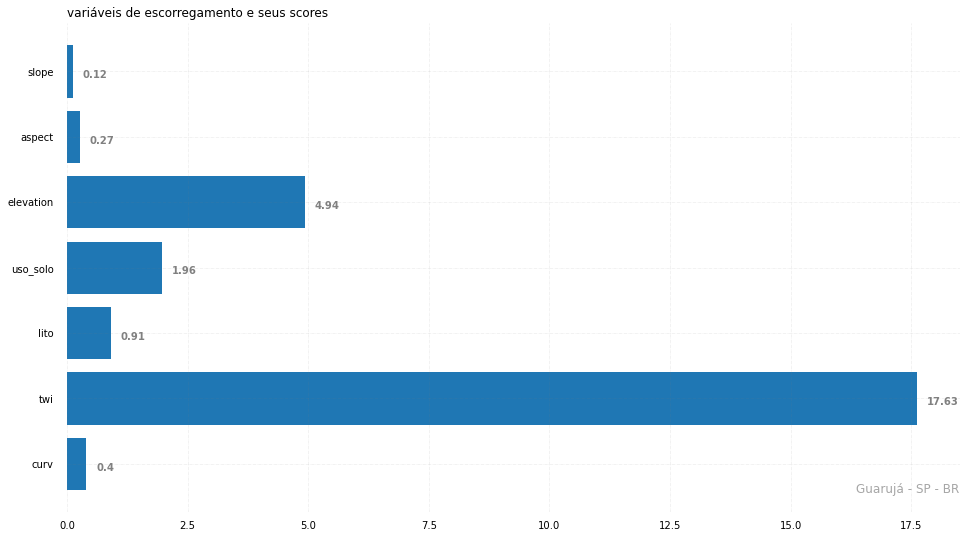

In [22]:
predictors = X_train.columns
# obtém os valores de p-values para cada feature e os transforma em 'pontos'
#scores = fs.pvalues_
scores = -np.log10(fs.pvalues_) #ouuu
#scores /= scores.max()

#scores = fs.scores_

# tamanho do gráfico
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(predictors, scores)
 
# Remove as spines dos eixos
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove os tickes dos eixos x, y
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# adiiona as gridlines x e y
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# exibe os valores nas barras
ax.invert_yaxis()
 
# pequenas anotações nas barras
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Titulo do gráfico
ax.set_title('variáveis de escorregamento e seus scores',
             loc ='left', )
 
# watermark
fig.text(0.9, 0.15, 'Guarujá - SP - BR', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# exibe o Plot
plt.show()

 - esse resultado do SelectKBest faz todo sentido com a matrix de correlação, onde as features aqui apontadas são aquelas de maior correlação com a coluna 'class', são elas:
    - elevation | elevation
    - uso_solo | uso_solo
    - twi | curvatura
    - curvatura | twi
    - lito | aspect
    - aspect | lito
    - slope | slope

__Outra abordagem__

__Seleção de Features__ - sklearn.feature_selection classe SelectPercentile 
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile
- https://python.hotexamples.com/pt/examples/sklearn.feature_selection/SelectPercentile/-/python-selectpercentile-class-examples.html

In [23]:
from sklearn.feature_selection import SelectPercentile

In [24]:
#X_train, X_test, X_val, y_train, y_test, y_val = dataPreparation2(dataset)

In [25]:
# define feature selection - o que seria esse percentile ?
fsP = SelectPercentile(score_func=f_classif, percentile=20)
# aplica a seleção de features
X_selected = fsP.fit_transform(X_train, y_train)
print(X_selected.shape)

(98, 2)


In [26]:
predictors = X.columns
predictors

Index(['slope', 'aspect', 'elevation', 'uso_solo', 'lito', 'twi', 'curv',
       'class'],
      dtype='object')

In [27]:
fsP.scores_

array([9.99941517e-02, 3.80250569e-01, 2.14081867e+01, 6.74799337e+00,
       2.43385889e+00, 1.17493779e+02, 7.34301941e-01])

In [28]:
# exibe as principais features
predictors = X.columns
nr_features = len(X.columns)
i = fsP.scores_.argsort()[::-1][:nr_features]
top_features = np.column_stack((predictors[i],
                                        fsP.scores_[i],
                                        fsP.pvalues_[i],
                                        -np.log10(fsP.pvalues_[i])
                                        ))

print("\nTop %i Features:" % nr_features)
features = pd.DataFrame(top_features, columns=["token", "score", "p-val","scored-p-val"])
print(features, "\n")


Top 8 Features:
       token       score     p-val scored-p-val
0        twi  117.493779       0.0    17.625663
1  elevation   21.408187  0.000012     4.935296
2   uso_solo    6.747993  0.010862     1.964078
3       lito    2.433859  0.122031      0.91353
4       curv    0.734302  0.393626     0.404916
5     aspect    0.380251  0.538929     0.268469
6      slope    0.099994  0.752523      0.12348 



In [29]:
features["normalized-scored-p-val"] = features["scored-p-val"]/features["scored-p-val"].max()
features["normalized-score"] = features["score"]/features["score"].max()
features

,token,score,p-val,scored-p-val,normalized-scored-p-val,normalized-score
0,twi,117.493779,0.0,17.625663,1.0,1.0
1,elevation,21.408187,0.000012,4.935296,0.280006,0.182207
2,uso_solo,6.747993,0.010862,1.964078,0.111433,0.057433
3,lito,2.433859,0.122031,0.91353,0.05183,0.020715
4,curv,0.734302,0.393626,0.404916,0.022973,0.00625
5,aspect,0.380251,0.538929,0.268469,0.015232,0.003236
6,slope,0.099994,0.752523,0.12348,0.007006,0.000851


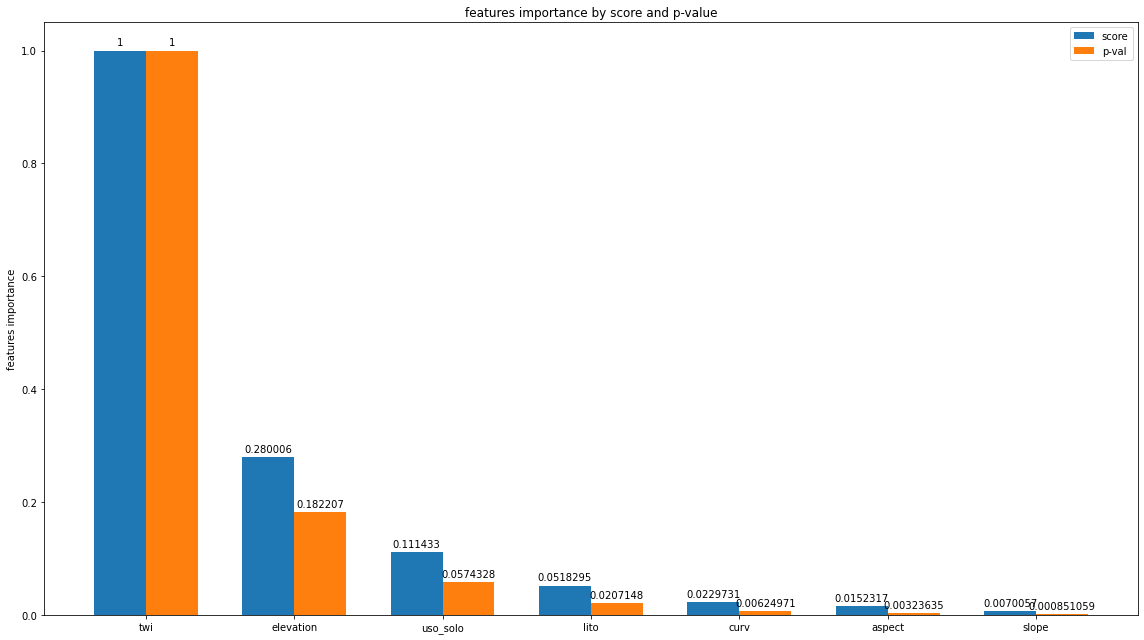

In [30]:
x = np.arange(len(features.index))  # the label locations
width = 0.35  # largura das barras
fig, ax = plt.subplots(figsize =(16, 9))

rects1 = ax.bar(x - width/2, features["normalized-scored-p-val"], width, label="score")
rects2 = ax.bar(x + width/2, features["normalized-score"], width, label='p-val')

ax.set_ylabel('features importance')
ax.set_title('features importance by score and p-value')
ax.set_xticks(x)
ax.set_xticklabels(features['token'])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

### __Segue agora técnicas propostas pelo artigo abaixo__
- https://paulovasconcellos.com.br/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-2e9df83d062a

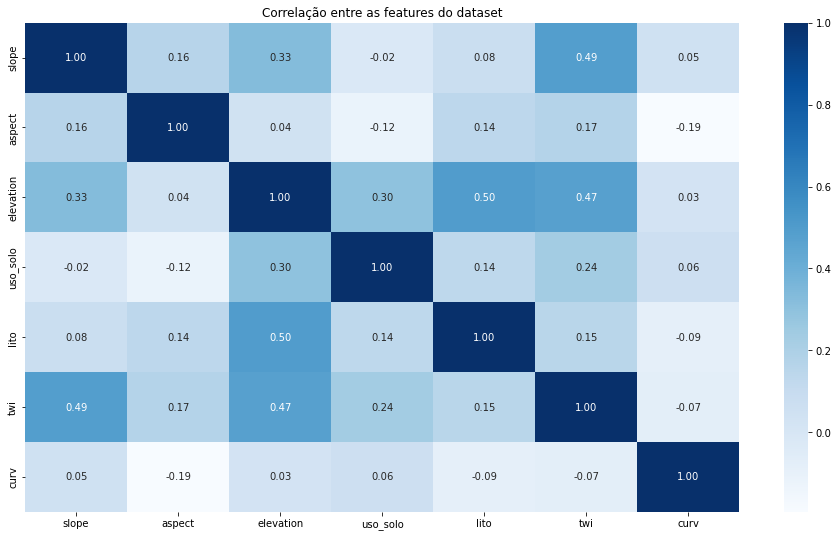

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 9))
sns.heatmap(X_train.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre as features do dataset')
plt.show()

In [32]:
#X_train, X_test, X_val, y_train, y_test, y_val = dataPreparation2(dataset)

### embedded ou intríseco tipo de seleção de features 
- Bagged decision trees, como Random Forest e Extra Trees, podem ser usadas para estimar a importância das features.
- ref. https://machinelearningmastery.com/feature-selection-machine-learning-python/

Text(0.5, 1.0, 'Importância de cada feature')

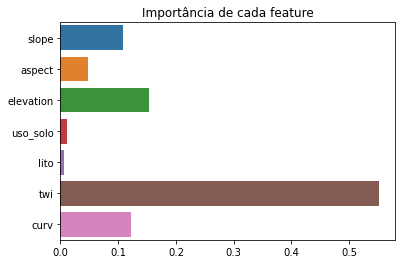

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import seaborn as sns 
predictors = X_train.columns
model  = RandomForestClassifier() 
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_
importances = pd.Series(data=model.feature_importances_, index=predictors)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

 - esse resultado do feature_importances_ faz todo sentido com a matrix de correlação e SelectKBest, onde as features aqui apontadas são aquelas de maior correlação com a coluna 'class', são elas:
    - [correlação] | [SelectKBest] | [importance (embedded)]
    - elevation | elevation | elevation
    - uso_solo | uso_solo | curvatura
    - twi | curvatura | slope
    - curvatura | twi | aspect
    - lito | aspect | twi
    - aspect | lito | uso_solo
    - slope | slope | lito

Text(0.5, 1.0, 'Importância de cada feature')

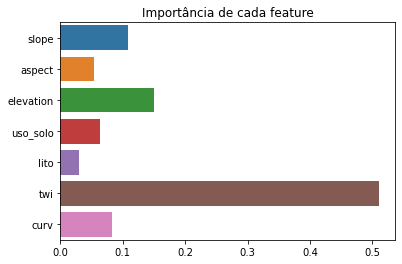

In [34]:
predictors = X_train.columns
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_
importances = pd.Series(data=model.feature_importances_, index=predictors)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

Text(0.5, 1.0, 'Importância de cada feature')

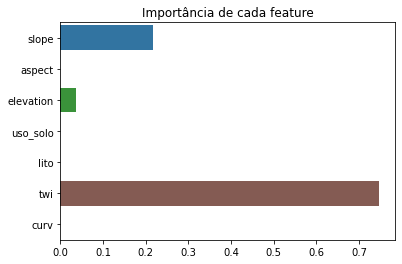

In [35]:
from sklearn.tree import DecisionTreeClassifier
predictors = X_train.columns
model = DecisionTreeClassifier()
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_
importances = pd.Series(data=model.feature_importances_, index=predictors)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

Text(0.5, 1.0, 'Importância de cada feature')

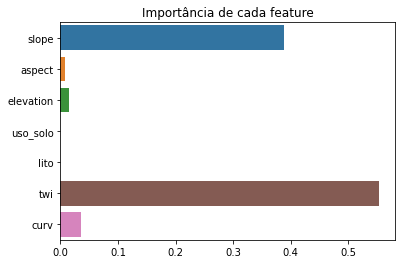

In [36]:
from xgboost import XGBClassifier
predictors = X_train.columns
model = XGBClassifier()
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_
importances = pd.Series(data=model.feature_importances_, index=predictors)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

### Recursive Feature Elimination (algoritmo do tipo wrapper para seleção de features)
- Recursive Feature Elimination (or RFE) funciona removendo recursivamente os atributos e construindo um modelo sobre os atributos que permanecem..

- Ele usa a acurácia do modelo para identificar quais atributos (e combinação de atributos) contribuem mais para prever a variável de destino.
- O algoritmo de classificação não importa muito, desde que ele seja consistente.
- Por ser um método de seleção do tipo wrapper, significa que um algoritmo de aprendizado de máquina diferente é fornecido e usado no núcleo do método. Este é empacotado pelo RFE e usado para ajudar a selecionar as features. Isso contrasta com as seleções de recursos com base em filtro que pontuam cada feature e selecionam as features com a maior (ou menor) pontuação.
- O RFE funciona procurando por um subconjunto de features, começando com todos elas no conjunto de dados de treinamento e removendo com sucesso as features até que o número desejado permaneça.

- __RFE is a transform. To use it, first the class is configured with the chosen algorithm specified via the “estimator” argument and the number of features to select via the “n_features_to_select” argument.__
- __The algorithm must provide a way to calculate important scores, such as a decision tree. The algorithm used in RFE does not have to be the algorithm that is fit on the selected features; different algorithms can be used.__
- __Once configured, the class must be fit on a training dataset to select the features by calling the fit() function. After the class is fit, the choice of input variables can be seen via the “support_” attribute that provides a True or False for each input variable.__

 - https://machinelearningmastery.com/rfe-feature-selection-in-python/
 - https://machinelearningmastery.com/feature-selection-machine-learning-python/

In [37]:
#https://machinelearningmastery.com/rfe-feature-selection-in-python/
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

In [38]:
# Como utilizar RFE - DEMO
model = RandomForestClassifier() #RandomForestClassifier() XGBClassifier
rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Features Selecionadas: %s" % fit.support_)
print("Ranking das Features : %s" % fit.ranking_)
# summarize all features
for i in range(X_train.shape[1]):
    print('Coluna: %d, Selected %s, Rank: %s' % (i, rfe.support_[i], rfe.ranking_[i]))

Num Features: 4
Features Selecionadas: [ True False  True False False  True  True]
Ranking das Features : [1 2 1 3 4 1 1]
Coluna: 0, Selected True, Rank: 1
Coluna: 1, Selected False, Rank: 2
Coluna: 2, Selected True, Rank: 1
Coluna: 3, Selected False, Rank: 3
Coluna: 4, Selected False, Rank: 4
Coluna: 5, Selected True, Rank: 1
Coluna: 6, Selected True, Rank: 1


- Python scikit-learn provides a Pipeline utility to help automate machine learning workflows. Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.

In [39]:
# configuração do modelo
model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=4)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# avaliação do modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), np.std(n_scores)))

Accuracy: 0.980 (0.040)


## usa um modelo com a combinação de todas as features do dataset e mede a performance

>2 0.973 (0.052)
>3 0.977 (0.042)
>4 0.980 (0.040)
>5 0.980 (0.040)
>6 0.980 (0.040)
>7 0.980 (0.040)


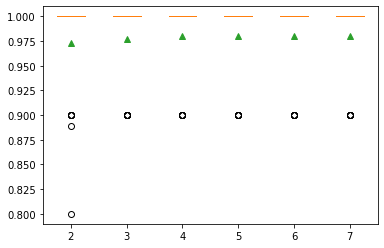

In [40]:
def get_model_features():
    models = dict()
    for i in range(2, 8):
        rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=i)
        model = RandomForestClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# avalia um modelo por meio de cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# obtém as configurações do RFE em um algoritmo configurado para todas as features
models = get_model_features()
# avalia as diversas configurações de RFE
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model,  X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

- essa abordagem evidencia que não precisamos mais que 3 ou 4 features, conforme anteriormente 

## Agora testa vários modelos com a quantidade de features consideradas ideal

In [41]:
# apartir de uma lista de modelos..
#Sobre get_models function: 

#The logistic regression model is only used by the RFE to evaluate different subsets of features selected by the RFE.
#Inicialmente, a regressão logistica é utilizada pelo RFE para avaliar/selecionar as features selecionadas pelo RFE.
#Em seguinda o algoritmo utilizado em 'model' utiliza as features selecionadas pelo RFE e 'fita' o modelo.
#The decision tree will take the features selected by the RFE and fit a model.

## rf
#	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
#	model = DecisionTreeClassifier()
#	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
def get_models():
    models = dict()
    n_features = 4
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=n_features)
    model = LogisticRegression()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=n_features)
    model = Perceptron()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=n_features)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=n_features)
    model = RandomForestClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=n_features)
    model = GradientBoostingClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

In [42]:
# avalia um determinado modelo usando cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

>lr 0.977 (0.042)
>per 0.844 (0.173)
>cart 0.970 (0.053)
>rf 0.980 (0.040)
>gbm 0.970 (0.053)


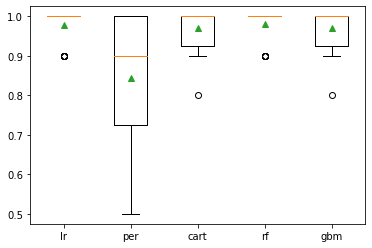

In [43]:
# recupera os modelos para avaliação
models = get_models()
# avalia os modelos e armazena os resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

__esse artigo merece ser lido__
- https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

__daqui em diante precisa de mais pesquisa__

__Seleção de Features__ - classe rulefit, não achei exemplos para clasificação binaria
- https://towardsdatascience.com/getting-more-from-regression-models-with-rulefit-2e6be8d77432
- http://statweb.stanford.edu/~jhf/ftp/RuleFit.pdf